Exploring Patterns in Mental Health Discourse 

Introduction

With increasing awareness of mental health issues, more people are turning to online platforms to seek support, share experiences, and gain information. Reddit’s r/mentalhealth community provides a rich, real-time source of data on how people experience and discuss mental health challenges.
Social media platforms like Reddit offer users a degree of anonymity, which can make them feel safer sharing sensitive or stigmatized issues.

Understanding how people discuss their mental health can guide practitioners and organizations in designing more effective outreach materials, support systems, and public health interventions tailored to current needs and issues.

Problem statement

Understanding the nature and dynamics of mental health discussions on Reddit's r/mentalhealth subreddit to identify prevalent mental health concerns, patterns of user engagement, and indicators of community support, with the goal of informing mental health support strategies and enhancing online community resources."

In [ ]:
objectives

Analyze Sentiment and Emotional Tone: Use natural language processing (NLP) to detect the sentiment (positive, negative, neutral) and emotional tone (e.g., anger, sadness, hope) of posts and comments, offering insights into users' emotional states and the community’s overall atmosphere.

Detect Peaks in Mental Health Conversations: Use timestamps to identify periods of high activity, such as specific times of day, days of the week, or months when mental health discussions peak, potentially tied to external events or seasonal changes.

Identify Risk Indicators or Crisis Language: Use text analysis to detect potential crisis language or self-harm indicators, helping mental health professionals understand how at-risk users might express distress online.

Understand Impact of User Demographics: Analyze metadata like account age or author premium status to see if user characteristics influence post topics, comment behavior, or engagement.

Explore Support Networks and User Interaction: Identify patterns in how users support each other, such as common phrases in supportive comments, frequency of advice-giving, and presence of empathy in responses.


Stakeholders of the data

Mental Health Researchers and Psychologists: Interested in understanding patterns in mental health discussions, symptoms, or coping mechanisms shared by users. 

Mental Health Organizations and Nonprofits: These groups could leverage insights to shape awareness campaigns, identify support needs, or understand prevalent mental health issues within specific online communities.

Social Media Analysts and Data Scientists: Professionals who focus on social media behavior or online discourse may be interested in the methods used and results from analyzing user-generated content around sensitive topics like mental health.

Academic Institutions and Students: Academic institutions and students studying data science, psychology, or public health might find this research beneficial for educational purposes, providing real-world examples of how social data can be analyzed for mental health research.

Public Health Policymakers: Insights into public mental health concerns and trends could inform policies, support services, or funding for mental health resources at a population level.

In [3]:
import pandas as pd
import numpy as numpy 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import statsmodels.api as sm
import nltk
import re
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [4]:
data = pd.read_csv(r'C:\Users\custohmer link\Documents\Flatiron\MENTAL HEALTH PROJCT DATA\Phase_5_Project\broad_reddit_search_with_labels (1).csv')
data.head()

c:\anaconda\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (3,5,8,12,15,16,17,18,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,title,post_body,comment_body,comment_score,post_url,created,subreddit,label,post_score,post_num_comments,...,author_premium,distinguished,all_awardings,num_crossposts,total_awards_received,post_thumbnail,link_flair_text,post_id,comment_id,author_flair_text
0,I don't know what's wrong with me,I'm finding it really hard to keep myself toge...,Have you got a therapist on board? Sounds like...,2,https://www.reddit.com/r/mentalhealth/comments...,1730483837,mentalhealth,mental_health_issue,1,1.0,...,False,NaN,[],0,0.0,self,Venting,1ghb2bs,luw5fgj,NaN
1,Friends who distance themselves from you or cu...,Please tell me if I sound entitled or selfish....,"I think it’s a combination of factors, and I s...",2,https://www.reddit.com/r/mentalhealth/comments...,1730479911,mentalhealth,mental_health_issue,1,1.0,...,False,NaN,[],0,0.0,self,Venting,1gh9prb,luvspbv,NaN
2,sometimes my brain just keeps telling me bad t...,Does anyone else ever get like this? Or have a...,"When I have a panic attack, I tend to think th...",1,https://www.reddit.com/r/mentalhealth/comments...,1730486174,mentalhealth,mental_health_issue,2,2.0,...,False,NaN,[],0,0.0,self,Venting,1gh98yg,luwcwu7,NaN
3,sometimes my brain just keeps telling me bad t...,Does anyone else ever get like this? Or have a...,Im wondering if it was simply a panic attack. ...,2,https://www.reddit.com/r/mentalhealth/comments...,1730486726,mentalhealth,mental_health_issue,2,2.0,...,False,NaN,[],0,0.0,self,Venting,1gh98yg,luwep2n,NaN
4,Need objective support. I’m in over my head,I feel in over my head and I’m not sure what t...,Please consider seeing a psychologist. Good luck!,1,https://www.reddit.com/r/mentalhealth/comments...,1730476772,mentalhealth,mental_health_issue,1,4.0,...,False,NaN,[],0,0.0,self,Need Support,1gh8q6w,luvir86,NaN


In [5]:
data.shape

(92419, 27)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92419 entries, 0 to 92418
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  92407 non-null  object 
 1   post_body              63739 non-null  object 
 2   comment_body           92401 non-null  object 
 3   comment_score          92401 non-null  object 
 4   post_url               92395 non-null  object 
 5   created                92395 non-null  object 
 6   subreddit              92395 non-null  object 
 7   label                  92395 non-null  object 
 8   post_score             92395 non-null  object 
 9   post_num_comments      92395 non-null  float64
 10  author                 92395 non-null  object 
 11  comment_author         92395 non-null  object 
 12  post_created           92395 non-null  object 
 13  post_flair             35214 non-null  object 
 14  upvote_ratio           92392 non-null  float64
 15  ov

In [7]:
data.columns

Index(['title', 'post_body', 'comment_body', 'comment_score', 'post_url',
       'created', 'subreddit', 'label', 'post_score', 'post_num_comments',
       'author', 'comment_author', 'post_created', 'post_flair',
       'upvote_ratio', 'over_18', 'is_self_post', 'author_premium',
       'distinguished', 'all_awardings', 'num_crossposts',
       'total_awards_received', 'post_thumbnail', 'link_flair_text', 'post_id',
       'comment_id', 'author_flair_text'],
      dtype='object')

Title breakdown
title: The title of the Reddit post.

post_body: The main text of the Reddit post.

comment_body: Text of a comment on the post.
comment_score: The score (upvotes - downvotes) of the comment.
post_url: The URL to the Reddit post.
created: The creation timestamp of the post.
subreddit: The name of the subreddit where the post was made.
label: A label or tag associated with the post (e.g., 'mental_health_issue').
post_score: The score (upvotes - downvotes) of the post.
post_num_comments: The number of comments on the post.
author_premium: Indicates if the author has Reddit Premium.
distinguished: Indicates if the post is distinguished (e.g., moderator or admin).
all_awardings: Awards received by the post.
num_crossposts: Number of times the post was crossposted.
total_awards_received: Total awards received by the post.
post_thumbnail: Thumbnail image associated with the post.
link_flair_text: Text associated with the link flair (e.g., 'Venting').
post_id: Unique identifier for the post.
comment_id: Unique identifier for the comment.
author_flair_text: Text associated with the author’s flair (if any)

In [8]:
data.describe()

,post_num_comments,upvote_ratio,total_awards_received
count,92395.000000,92392.000000,92395.0
mean,294.855923,0.864616,0.0
std,399.616430,0.172152,0.0
min,1.000000,0.060000,0.0
25%,43.000000,0.840000,0.0
50%,139.000000,0.930000,0.0
75%,389.000000,0.970000,0.0
max,2523.000000,1.000000,0.0


Dropping columns

In [9]:
columns_to_drop = [
    'post_url', 'post_thumbnail', 'distinguished', 'all_awardings', 
    'link_flair_text', 'author_flair_text', 'author_premium', 'is_self_post', 
    'created', 'post_created', 'post_id', 'comment_id', 'author', 'comment_author'
]
df = data.drop(columns=columns_to_drop)
df.head()

,title,post_body,comment_body,comment_score,subreddit,label,post_score,post_num_comments,post_flair,upvote_ratio,over_18,num_crossposts,total_awards_received
0,I don't know what's wrong with me,I'm finding it really hard to keep myself toge...,Have you got a therapist on board? Sounds like...,2,mentalhealth,mental_health_issue,1,1.0,Venting,1.0,False,0,0.0
1,Friends who distance themselves from you or cu...,Please tell me if I sound entitled or selfish....,"I think it’s a combination of factors, and I s...",2,mentalhealth,mental_health_issue,1,1.0,Venting,1.0,False,0,0.0
2,sometimes my brain just keeps telling me bad t...,Does anyone else ever get like this? Or have a...,"When I have a panic attack, I tend to think th...",1,mentalhealth,mental_health_issue,2,2.0,Venting,1.0,False,0,0.0
3,sometimes my brain just keeps telling me bad t...,Does anyone else ever get like this? Or have a...,Im wondering if it was simply a panic attack. ...,2,mentalhealth,mental_health_issue,2,2.0,Venting,1.0,False,0,0.0
4,Need objective support. I’m in over my head,I feel in over my head and I’m not sure what t...,Please consider seeing a psychologist. Good luck!,1,mentalhealth,mental_health_issue,1,4.0,Need Support,1.0,False,0,0.0


In [11]:
df.columns

Index(['title', 'post_body', 'comment_body', 'comment_score', 'subreddit',
       'label', 'post_score', 'post_num_comments', 'post_flair',
       'upvote_ratio', 'over_18', 'num_crossposts', 'total_awards_received'],
      dtype='object')

In [12]:
df.isnull().sum()

title                       12
post_body                28680
comment_body                18
comment_score               18
subreddit                   24
label                       24
post_score                  24
post_num_comments           24
post_flair               57205
upvote_ratio                27
over_18                     24
num_crossposts              24
total_awards_received       24
dtype: int64

In [16]:
df = df.drop(columns=['post_flair'], errors='ignore')

In [17]:
df['post_body'].fillna("", inplace=True)
df['comment_body'].fillna("", inplace=True)
df['title'].fillna("No Title", inplace=True)


In [18]:
df['subreddit'].fillna("Unknown", inplace=True)
df['label'].fillna("Unknown", inplace=True)
df['over_18'].fillna("Unknown", inplace=True)


In [20]:
# Convert columns to numeric, setting non-numeric entries to NaN
numeric_columns = ['comment_score', 'post_score', 'upvote_ratio', 'num_crossposts', 'total_awards_received', 'post_num_comments']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Now fill missing values with the median for each column
for col in numeric_columns:
    df[col].fillna(df[col].median(), inplace=True)


In [21]:
df.isnull().sum()

title                    0
post_body                0
comment_body             0
comment_score            0
subreddit                0
label                    0
post_score               0
post_num_comments        0
upvote_ratio             0
over_18                  0
num_crossposts           0
total_awards_received    0
dtype: int64

In [22]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 2277


In [23]:
df.drop_duplicates(inplace=True)

In [24]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [25]:
df.columns = df.columns.str.strip()

In [ ]:
# Visual analysis

Univariate Analysis

For univariate analysis, we will focus on one variable at a time to understand its distribution or typical values

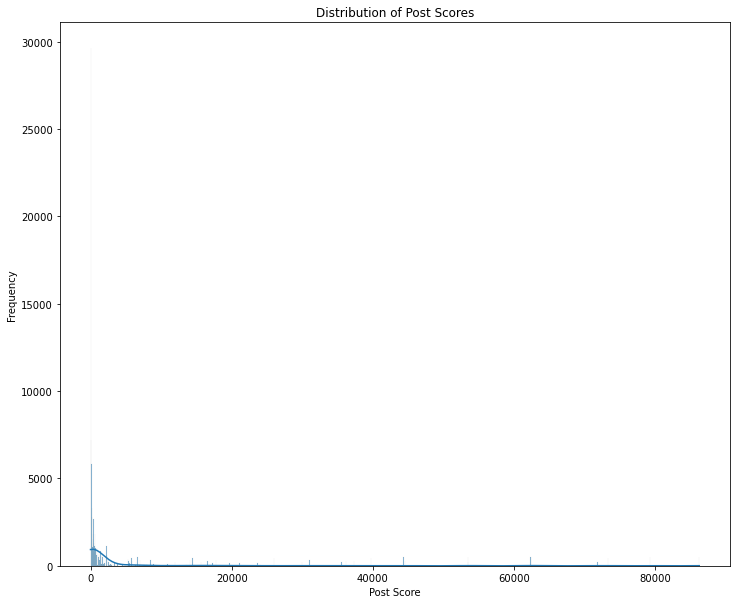

In [26]:
plt.figure(figsize=(12, 10))
sns.histplot(df['post_score'], kde=True)
plt.title('Distribution of Post Scores')
plt.xlabel('Post Score')
plt.ylabel('Frequency')
plt.show()

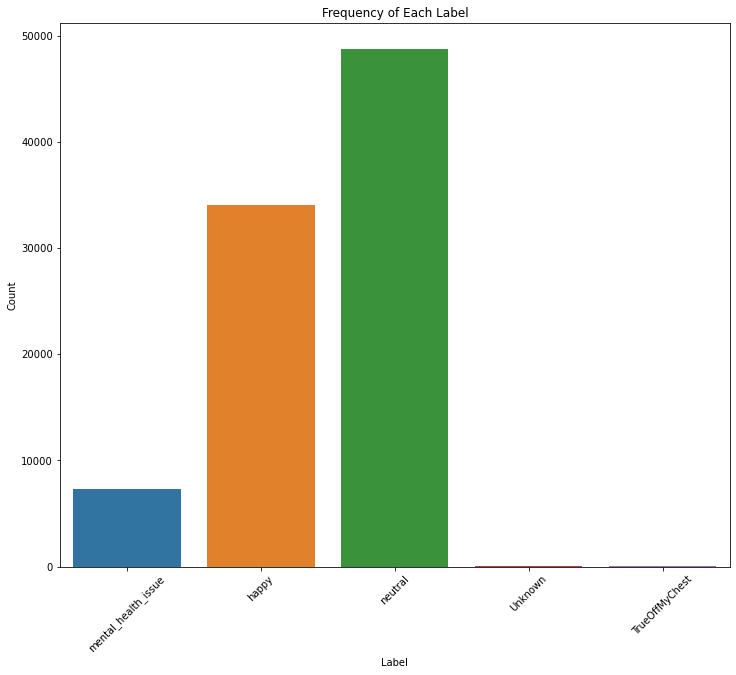

In [27]:
plt.figure(figsize=(12, 10))
sns.countplot(data=df, x='label')
plt.title('Frequency of Each Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()